#### A well-regulated militia, being necessary to the security of a free state, the right of the people to keep and bear arms shall not be infringed
*Second amendment to the US constitution*

# Who Has Gun Control Right?

*This work is work in progress*

<br />
By [Gilles Pirio](mailto:gilles.xrp@gmail.com) October 29, 2015

Gun control is a bitterly debatted topic in today's America. Both sides come with their own certainties -- often unproven and ideological -- about the effect of gun control on society (or the lack thereof). 

The proponent of gun control claims that more guns always induces more violence and death. The opponents, like the NRA, advocate for more people to carry guns to protect themselves. Shooting(!) matches aside, both sides simply refuse to talk to each other.

Unlawful killings must be prevented. But to do so, an understanding of what is really happening is necessary. Even though it is rather morbid, the following models tries to investigate how gun ownership affects the number of unlawful killings in a given country.


### Modeling

Let's try to model the amount of victim of unlawful killings by firearms in a given country (or state) in a given year. Even though they understandably take a lot of space in the mainstream media, unlawful killings by security forces like the police are considered negligeable. 

In any given year, some individuals will infortunately try to kill one (like a husband shooting down his ex-wife) or more than one (like the horrific events that happened in US schools in the past years). We note the amount of people a killer intends to eliminate `p`. The number of victims for a given `p`, `V(p)` can be written as:


$$ V(p) = P \, e(p) \, u(g) \, d(p,g) $$

Where `d(p,g)` is the expected number of death during a killing event:

$$ d(p,g) = p \, r(p,g) $$


`P` is the total population. `e(p)` is the propability for a given person in the general population would take action and commit murder and attempt to kill `p` persons. `g` is the gun ownership rate, `u(g)` is the rate of people who have access to guns (own one, or can easily get one) and know how to use it. Finally, `r(p,g)` is the fatality rate during a event.

Estimating `u(g)` is a difficult task. It is pretty clear the function is concave. We will use the simple following formula, that we will also plot:
$$ u(g) =\frac{g}{1+g} $$

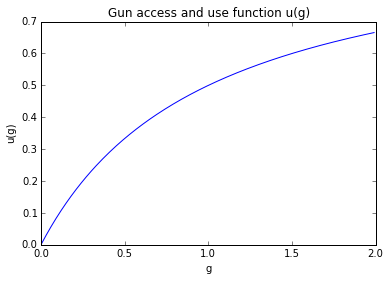

In [135]:
from math import sqrt, log, exp
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

gs = np.arange(0,2,0.01)

# Function u(g)
def u(g):
  return g/(1+g)

# Plot
plt.plot(gs, map(lambda g: u(g), gs))
plt.xlabel('g')
plt.ylabel('u(g)')
plt.title('Gun access and use function u(g)')
def stop(g, s, p):
  return 1-(1-s*u(g))**p

This matches the US data since in the US there is about 1 gun for every inhabitant (`g = 1.0`) while the number of people owning a gun is 37%. Even though our value for `u(1.0)` is `0.5` so above `0.37`, it is consistent since it is possible for somebody not owing a gun to easily find one - and learn how to use one. As expected, for small `g`, we have:
$$ u(g) \approx g $$

We now need to model `r(p,g)`. Let `s` the probability for someone with a gun present during an event to stop the killer and prevent any killing. Obviously there is an approximation here as the killer could be partially successful. However taking this in consideration would not change the outcome much (is that always true?). The probability for the killer to be stopped becomes:
$$ 1-(1-s\,u(g))^p $$
And therefore:
$$ r(p,g) = (1-s\,u(g))^p $$
$$ d(p,g) = u(g) \, p \, (1-s\,u(g))^p $$
We will now plot the expected number of death `d` during an event depending on the `g`, `p`. We will assume `s = 0.5`, that is that a person with a gun has a 50% chance to stop the killer.

In [159]:
# Define r and d functions
def r(p, g, s):
  return (1-s*u(g))**p
def d(p, g, s):
  return p*r(p, g, s)

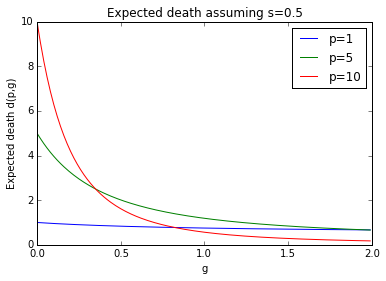

In [180]:
# Plot the number of expected death assuming s = 0.5
s = 0.5
p = 1
plt.plot(gs, map(lambda g: d(p, g, s), gs), label = 'p=1')
p = 5
plt.plot(gs, map(lambda g: d(p, g, s), gs), label = 'p=5')
p = 10
plt.plot(gs, map(lambda g: d(p, g, s), gs), label= 'p=10')
plt.xlabel('g')
plt.ylabel('Expected death d(p,g)')
plt.title('Expected death assuming s=0.5')
plt.legend()

Now let's put it all together and find out the number of expected death assuming there are 100 people in the a given country about to start a killing spree and attempt to kill 1 (or 10) people:

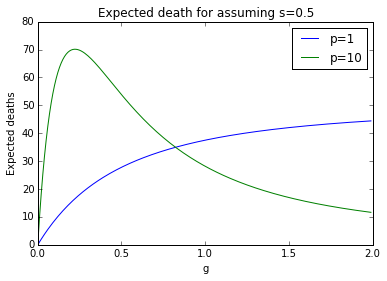

In [227]:
s = 0.5
p = 1
plt.plot(gs, map(lambda g: 100*u(g)*d(p, g, s), gs), label= 'p=1')
p = 10
plt.plot(gs, map(lambda g: 100*u(g)*d(p, g, s), gs), label= 'p=10')
plt.xlabel('g')
plt.ylabel('Expected deaths')
plt.title('Expected death for assuming s=0.5')
plt.legend()

For small `g`, it is clear that the amount of death will be proportional to `g` and remain small. In that range, the less guns, the less death. But for higher values of `g`, this may not hold. Indeed, the number of death may increase as the rate of gun in circulation decreases. The NRA, therefore has a point -- in certain specific conditions, more guns may mean *less* death. 

Finally, the total number of unlawful killings would be:
$$ V = \sum_{p=1} V(p) = P \, \sum_{p=1} e(p)\,u(g)\,d(p,g) $$
`e(p)` is not known but it is very likely that `e(p)` decreases quickly with `p` -- most of the murders target only 1 person. If we assume that:
$$ e(p) = \frac{1000}{p}  $$
The total death toll can be shown below:

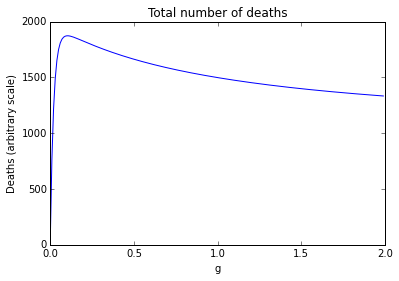

In [224]:
s = 0.5
p = 1
ps = range(1,101)
plt.plot(gs, map(lambda g: sum(map(lambda p: 1000/p*u(g)*d(p, g, s), ps)), gs))
plt.xlabel('g')
plt.ylabel('Deaths (arbitrary scale)')
plt.title('Total number of deaths')

In that case, there is definitely a 2 different domains:
* For small `g`, reducing the amount of guns in circulation will *reduce* the total deaths
* For `g` above `0.15`, the reverse is true


If we now assume that:
$$ e(p) = \frac{1000}{p^2}  $$
The total death toll can be shown below:

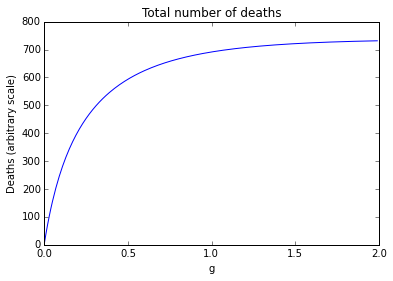

In [225]:
s = 0.5
p = 1
ps = range(1,101)
plt.plot(gs, map(lambda g: sum(map(lambda p: 1000/p**2*u(g)*d(p, g, s), ps)), gs))
plt.xlabel('g')
plt.ylabel('Deaths (arbitrary scale)')
plt.title('Total number of deaths')

In that case, reducing `g` will lead to a reduction of the number of death in the considered country.


## Conclusion

First, the model presented above is a -- very bad -- aproximation of a complex reality and only week conclusions should be drawn from such an exercise. However, we clearly see two things:
* In a society where the gun ownership `g` is low, it is pretty clear that the amount of unlawful killings by firearms will be proportional to `g`. So reducing and/or strongly limiting the amount of guns in circulation will be key in limiting the number of deaths. This corresponds to the European style of society.
* There are non-linear effects as `g` become larger. So trying to bring European-style conclusions in a US-style societies is simply intellectual fraud.

Finally, it's pretty clear that going from a society where `g > 1.0` (the US) to a society where `g << 1.0` (most European countries) would take tens of years or even generations. And a strong political will would anyway be required. Whatever happens, the first step would be for both sides to get to a common understanding of two competing models of society.